# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# Output File (CSV)
output_data_file = "output_data/cities.csv"
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "Imperial"
api_key = weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key   
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

record = 1


print(f"Beginning Data Retrieval")
print(f"------------------------------")


for city in cities:
    
    
    try:
        weather_response = requests.get(f"{url}&q={city}").json()
        city_name.append(weather_response["name"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        humidity.append(weather_response["main"]["humidity"])
        cloudiness.append(weather_response["clouds"]["all"])
        windspeed.append(weather_response["wind"]["speed"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        city_record = weather_response["name"]
        print(f"Processing Record {record} | {city_record}")
    
        record = record + 1
        
    except:
        print("City not found. Skip")
    continue
        

Beginning Data Retrieval
------------------------------
Processing Record 1 | Hobart
Processing Record 2 | Gulbene
Processing Record 3 | Castro
City not found. Skip
Processing Record 4 | Esperance
Processing Record 5 | Kapaa
Processing Record 6 | Husavik
Processing Record 7 | Souillac
Processing Record 8 | Saint Paul Harbor
Processing Record 9 | Tibati
City not found. Skip
Processing Record 10 | Hithadhoo
Processing Record 11 | Ribeira Grande
Processing Record 12 | Rikitea
Processing Record 13 | Hambantota
Processing Record 14 | Tuyen Quang
Processing Record 15 | Mataura
Processing Record 16 | Mar del Plata
Processing Record 17 | Ventspils
Processing Record 18 | Yellowknife
Processing Record 19 | Bengkulu
Processing Record 20 | Nikolskoye
Processing Record 21 | Ushuaia
Processing Record 22 | Albany
Processing Record 23 | Bredasdorp
Processing Record 24 | Busselton
Processing Record 25 | Bealanana
Processing Record 26 | Ferme-Neuve
Processing Record 27 | Vaini
Processing Record 28 | Hil

Processing Record 230 | Dingle
Processing Record 231 | Nanortalik
Processing Record 232 | Antofagasta
Processing Record 233 | Avera
Processing Record 234 | Gravdal
Processing Record 235 | Karaton
City not found. Skip
Processing Record 236 | Tuatapere
Processing Record 237 | Tautira
Processing Record 238 | Bathsheba
Processing Record 239 | Bāgepalli
Processing Record 240 | Kuybyshevo
Processing Record 241 | Cidreira
Processing Record 242 | Tooele
Processing Record 243 | Constitución
Processing Record 244 | Wanning
City not found. Skip
Processing Record 245 | Mitú
City not found. Skip
Processing Record 246 | Abhā
Processing Record 247 | Vao
Processing Record 248 | Eirunepé
Processing Record 249 | Bambanglipuro
Processing Record 250 | Esim
Processing Record 251 | Longyearbyen
City not found. Skip
Processing Record 252 | Pitimbu
Processing Record 253 | Wonthaggi
Processing Record 254 | Paamiut
Processing Record 255 | São Filipe
Processing Record 256 | Havre-St-Pierre
Processing Record 257 

Processing Record 463 | Port-Gentil
Processing Record 464 | Maricá
Processing Record 465 | Skjervøy
Processing Record 466 | Karpathos
City not found. Skip
Processing Record 467 | Yulara
Processing Record 468 | Jijiga
Processing Record 469 | Mahon
Processing Record 470 | Sortland
Processing Record 471 | Olinda
Processing Record 472 | Nyurba
Processing Record 473 | Mahanoro
Processing Record 474 | Northam
Processing Record 475 | Chiredzi
Processing Record 476 | Oyama
Processing Record 477 | Siguiri
Processing Record 478 | Mareeba
City not found. Skip
Processing Record 479 | Ostrovnoy
Processing Record 480 | San Julián
Processing Record 481 | Banjar
Processing Record 482 | Anzhero-Sudzhensk
Processing Record 483 | Harbour Breton
Processing Record 484 | Fort Nelson
Processing Record 485 | Vardø
Processing Record 486 | Morehead
Processing Record 487 | Whitehorse
Processing Record 488 | Zhovti Vody
Processing Record 489 | Kyren
Processing Record 490 | Coyhaique
Processing Record 491 | Beaver

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weatherDF = pd.DataFrame({
    "City": city_name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date})

weatherDF.to_csv("../output_data/weatherDF.csv")
weatherDF.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hobart,-42.88,147.33,57.00,62,75,11.41,AU,1603761521
1,Gulbene,57.18,26.75,48.42,89,95,10.07,LV,1603761602
2,Castro,-24.79,-50.01,62.35,90,100,3.02,BR,1603761602
3,Esperance,-33.87,121.90,66.20,72,0,5.82,AU,1603761602
4,Kapaa,22.08,-159.32,75.20,78,75,16.11,US,1603761603


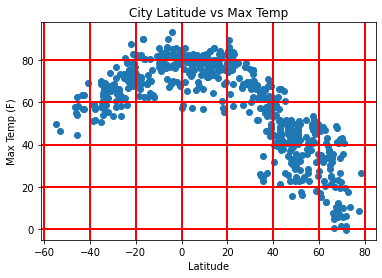

<Figure size 432x288 with 0 Axes>

In [8]:
x_values = weatherDF["Lat"]
y_values = weatherDF["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("City Latitude vs Max Temp")
plt.grid(color='r', linestyle='-', linewidth=2)
plt.show()
plt.savefig("../output_data/Fig1.png")

## Latitude vs. Humidity Plot

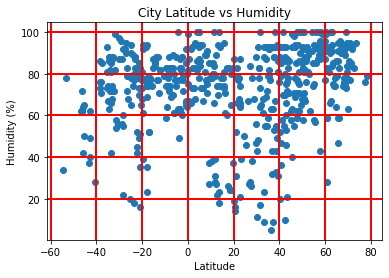

In [9]:
x_values = weatherDF["Lat"]
y_values = weatherDF["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")
plt.grid(color='r', linestyle='-', linewidth=2)
plt.savefig("../output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

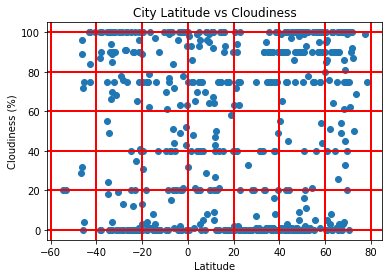

In [10]:
x_values = weatherDF["Lat"]
y_values = weatherDF["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")
plt.grid(color='r', linestyle='-', linewidth=2)
plt.savefig("../output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

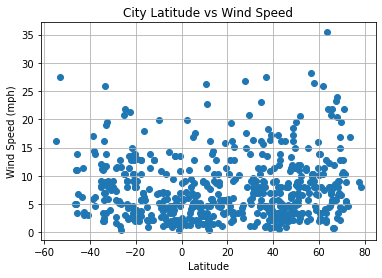

In [11]:
x_values = weatherDF["Lat"]
y_values = weatherDF["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

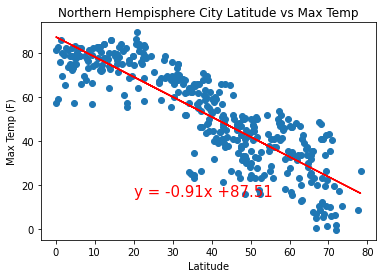

In [12]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = northern["Lat"]
y_values = northern["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hempisphere City Latitude vs Max Temp")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

plt.savefig("../output_data/Fig5.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

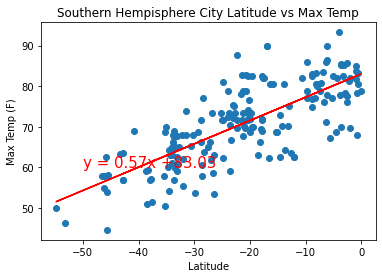

In [13]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = southern["Lat"]
y_values = southern["Max Temp"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hempisphere City Latitude vs Max Temp")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

plt.savefig("../output_data/Fig6.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

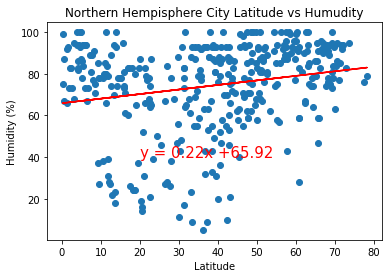

In [14]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = northern["Lat"]
y_values = northern["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hempisphere City Latitude vs Humudity")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.savefig("../output_data/Fig7.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

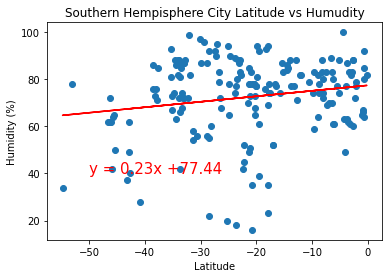

In [15]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = southern["Lat"]
y_values = southern["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hempisphere City Latitude vs Humudity")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

plt.savefig("../output_data/Fig8.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

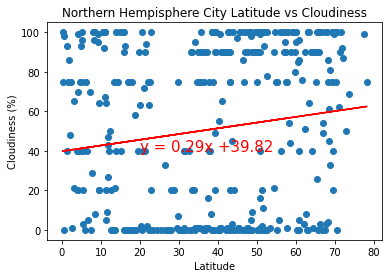

In [16]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = northern["Lat"]
y_values = northern["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hempisphere City Latitude vs Cloudiness")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.savefig("../output_data/Fig9.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

-0.06713166540203151


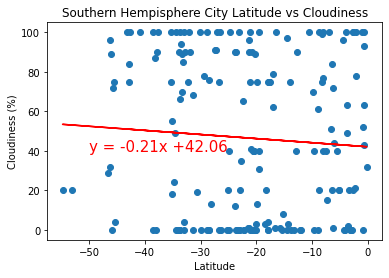

In [20]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = southern["Lat"]
y_values = southern["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hempisphere City Latitude vs Cloudiness")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

#plt.savefig("../output_data/Fig10.png")
print(rvalue)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

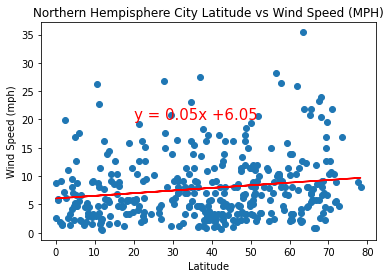

In [18]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = northern["Lat"]
y_values = northern["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hempisphere City Latitude vs Wind Speed (MPH)")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")

plt.savefig("../output_data/Fig11.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

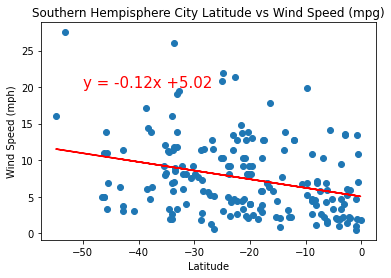

In [19]:
northern = weatherDF.loc[weatherDF["Lat"]>=0]
southern = weatherDF.loc[weatherDF["Lat"]<0]
x_values = southern["Lat"]
y_values = southern["Wind Speed"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hempisphere City Latitude vs Wind Speed (mpg)")

plt.show



(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.savefig("../output_data/Fig12.png")